# STAT 301 Project: Computational Code and Output (Assignment 4)
#### Group 23: Roberto Mulliadi

## Data Description

In [1]:
# Loading required libraries to preview data
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Loading the data from URL using read_url
url <- "https://raw.githubusercontent.com/robertomulliadi/STAT-301-Project/main/marketing_AB.csv"
marketing_campaigns_data <- read_csv(url)

# Rename the columns
colnames(marketing_campaigns_data) <- c("index", "user_id", "test_group", "converted", "total_ads", "most_ads_day", "most_ads_hour")


# Presenting the first and last few rows of observations using head and tail
head(marketing_campaigns_data, 5)
tail(marketing_campaigns_data, 5)

New names:
• `` -> `...1`
Rows: 588101 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): test group, most ads day
dbl (4): ...1, user id, total ads, most ads hour
lgl (1): converted

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<dbl>
0,1069124,ad,FALSE,130,Monday,20
1,1119715,ad,FALSE,93,Tuesday,22
2,1144181,ad,FALSE,21,Tuesday,18
3,1435133,ad,FALSE,355,Tuesday,10
4,1015700,ad,FALSE,276,Friday,14


index,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<dbl>
588096,1278437,ad,FALSE,1,Tuesday,23
588097,1327975,ad,FALSE,1,Tuesday,23
588098,1038442,ad,FALSE,3,Tuesday,23
588099,1496395,ad,FALSE,1,Tuesday,23
588100,1237779,ad,FALSE,1,Tuesday,23


In [3]:
# Check for missing values in all columns
missing_values <- colSums(is.na(marketing_campaigns_data))
missing_values

index       user_id    test_group     converted     total_ads 
            0             0             0             0             0 
 most_ads_day most_ads_hour 
            0             0

We can see that there are no missing values in the data, and that it is already in a tidy format since each variable is in a separate column, and each observation is in a separate row. The column names have been renamed to have underscores between words for code readability, consistency as well as ease of use. Hence, we are ready to start exploring the data further for insights

In [4]:
# Storing the total number of observations in N
N <- nrow(marketing_campaigns_data)
print(N)

[1] 588101


#### Data Overview

**Motivation:** <br>
Marketing firms aim to conduct effective campaigns, but the market's complexity means there are often multiple viable strategies. Consequently, they typically employ A/B testing, a randomized experimental process in which different versions of a variable are simultaneously presented to distinct audience segments. This helps determine which version yields the greatest impact and enhances key business metrics. The dataset is collected from Kaggle (https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing), and the main aim is to find out whether using ads would be successful in terms of sales which will be measured by conversion rates. 

We first observe that the number of observations in the dataset is 588101, and that there are 7 variables to be considered for analysis.

**Data Dictionary:**
- **index (numeric):** Row index (unique)
- **user id (numeric):** User ID (unique)
- **test group (text):** If "ad" then the person saw the advertisement, if "psa" then they only saw the public service announcement
- **converted (boolean):** If a person purchased the product then TRUE, else FALSE
- **total ads (numeric):** The amount of ads seen by a user
- **most ads day (text):** Day that the user saw the largest amount of ads
- **most ads hour (numeric):** Hour of day that the user sees the largest amount of ads



## Research Question

"What is the impact of distinct advertising strategies on conversion rates in an A/B testing scenario, considering the influence of ad frequency and time variables? Specifically, how does varying ad frequency affect conversion rates under different time intervals?"




### Hypotheses:
**Null hypothesis:** There is no difference in mean conversion rates between the two groups (psa and ad)<br>
**Alternative hypothesis:** The mean conversion rate in the "ad" group is greater than the mean conversion rate in the "psa" group<br>


$H_0: \mu_1 - \mu_2 = 0$ <br>
$H_A: \mu_1 - \mu_2 > 0$ <br>

Where $\mu_1$ is the mean conversion rate of the "ad" group and $\mu_2$ is the mean conversion rate of the "psa" group. <br>
These hypotheses will be consistent throughout every test in the group sequential design as well as the two-sample t-test

**Response Variables:** 
- Conversion rate (derived from "converted" variable) <br>

**Explanatory Variables:**
- test group
- total ads
- most ads day
- most ads hour
- time variable (derived from index)

**Focus:** <br>
The research question leans towards **inference**. The goal is to gain an understanding of the influence of diverse advertising strategies and their relationships with factors like ad frequency, the day with the highest ad exposure, and the optimal ad-viewing hour. This analysis will enable the project to derive insights and make conclusions about the effectiveness of advertising strategies in the context of the specified dataset variables.

**How will my data adrress the question of interest?** <br>
By analyzing the variables of interest in my dataset, I can conduct statistical tests (A/B testing, hypothesis tests, confidence intervals, etc) and apply other appropriate methods to assess the impact of advertising strategies, which are determined by the variable "test group" in my dataset. My dataset provides me the information that is needed to conduct my planned tests and to ultimately answer my research question argumentatively.

## Exploratory Data Analysis

In [5]:
# Summary statistics for 'total ads'
summary(marketing_campaigns_data$total_ads)

# Summary statistics for 'most ads hour'
summary(marketing_campaigns_data$most_ads_hour)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.00   13.00   24.82   27.00 2065.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   11.00   14.00   14.47   18.00   23.00 


**total_ads summary statistics:**
- The data ranges from a minimum of 1 ad to a maximum of 2065 ads, indicating a wide variation in ad exposure.
- The mean (average) number of ads seen is approximately 24.82, suggesting a moderate ad exposure on average.
- The majority of users fall within the range of 4 ads (1st quartile) to 27 ads (3rd quartile), with a median of 13 ads, indicating that most users saw a relatively moderate number of ads.
  
**most_ads_hour summary statistics:**
- The data ranges from a minimum of 0 (which could indicate no specific peak hour) to a maximum of 23, representing 24-hour time format.
- The mean 'most ads hour' is approximately 14.47, suggesting a central tendency around the middle of the day.
- Most users' peak ad exposure hours fall within the range of 11 (1st quartile) to 18 (3rd quartile), with a median of 14 hours, indicating that the majority of users have their peak ad exposure during daytime hours.

In [6]:
# Calculate the total number of users in each test group
total_users <- table(marketing_campaigns_data$test_group)

# Print the total number of users
print(total_users)


# Create a frequency table to view conversion counts in each test group
frequency_table <- table(marketing_campaigns_data$test_group, marketing_campaigns_data$converted)
frequency_df <- as.data.frame(frequency_table)
colnames(frequency_df) <- c("Test_Group", "Converted", "Frequency")

title <- "Frequency Table of Conversion Counts by Test Group"
cat("\n", title, "\n\n")
print(frequency_df)


    ad    psa 
564577  23524 

 Frequency Table of Conversion Counts by Test Group 

  Test_Group Converted Frequency
1         ad     FALSE    550154
2        psa     FALSE     23104
3         ad      TRUE     14423
4        psa      TRUE       420


The table indicates that in the 'ad' test group, 550,154 users did not convert (FALSE), while 14,423 users did convert (TRUE). This suggests that a relatively large number of users in the 'ad' group did not make a purchase. In contrast, in the 'psa' test group, 23,104 users did not convert, and only 420 users did convert. This shows that the 'psa' group also had a considerable number of non-converters, but the number of converters is notably smaller.

**However, there is considerable class imbalance present, and so we will move forward with conversion rates (the proportion of users who converted)**

We can also visualize these results through the following histograms for enhanced interpretability:

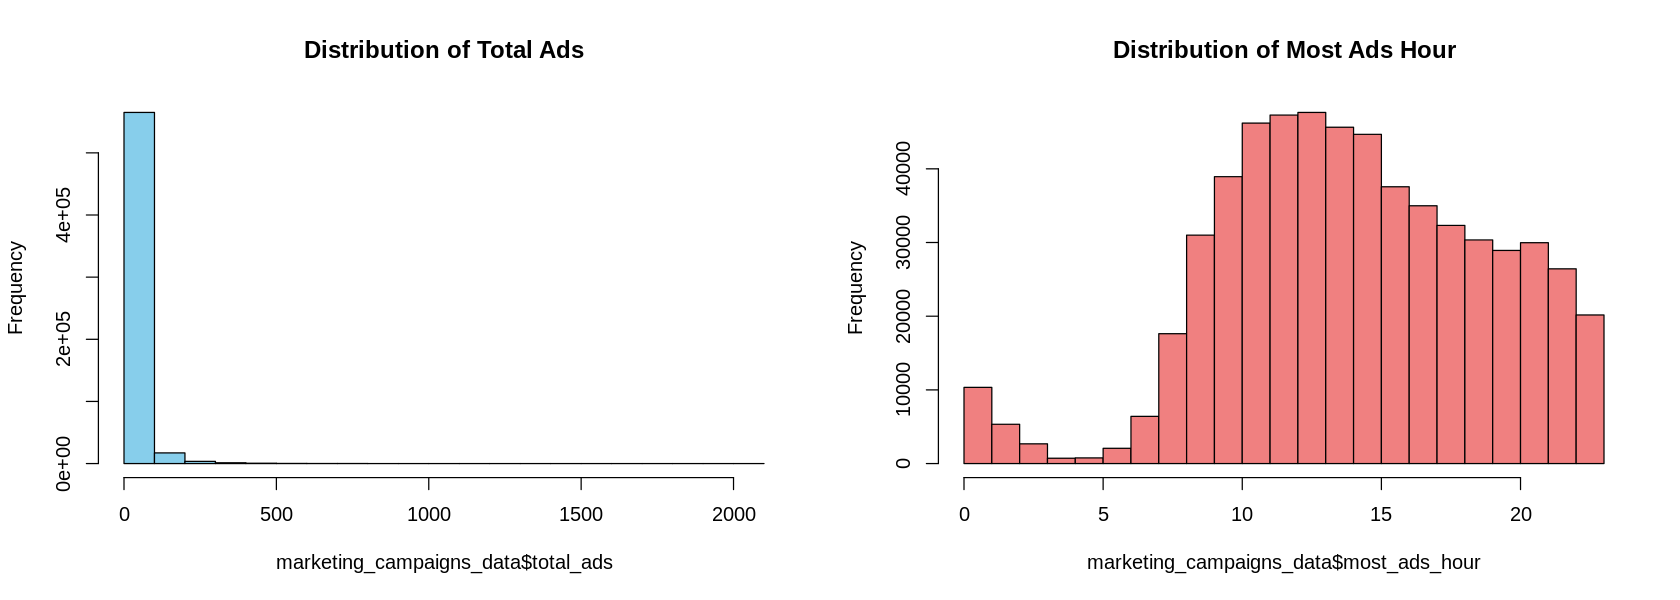

In [7]:
options(repr.plot.width = 14)  # Adjust the width
options(repr.plot.height = 5)  # Adjust the height

# Set up a 1x2 layout for side-by-side plots
par(mfrow = c(1, 2))

# Create a histogram for 'total_ads'
hist(marketing_campaigns_data$total_ads, col = "skyblue", main = "Distribution of Total Ads")

# Create a histogram for 'most_ads_hour'
hist(marketing_campaigns_data$most_ads_hour, col = "lightcoral", main = "Distribution of Most Ads Hour")

**Ditribution of Total Ads:** <br>
The plot shows the range of ad exposure levels, with the majority of users having a relatively low number of total ads seen, as indicated by the peak on the left side of the distribution. The graph suggests that most users have a lower exposure to ads, with fewer users having significantly higher levels of ad exposure.

**Distribution of Most Ads Hour:** <br>
The histogram of 'Most Ads Hour' illustrates the distribution of the most common hours at which users view ads. We can see the frquency of different housr, with some hourse showing higher peaks. Peak time is around 12 to 13 o'clock, and the ads viewed at midnight until around 6 o'clock is much lower than other hours of the day. This may be due to to the fact that these are common sleeping hours. Generally, this plot provides information about the patterns in ad viewing times accross the user base.

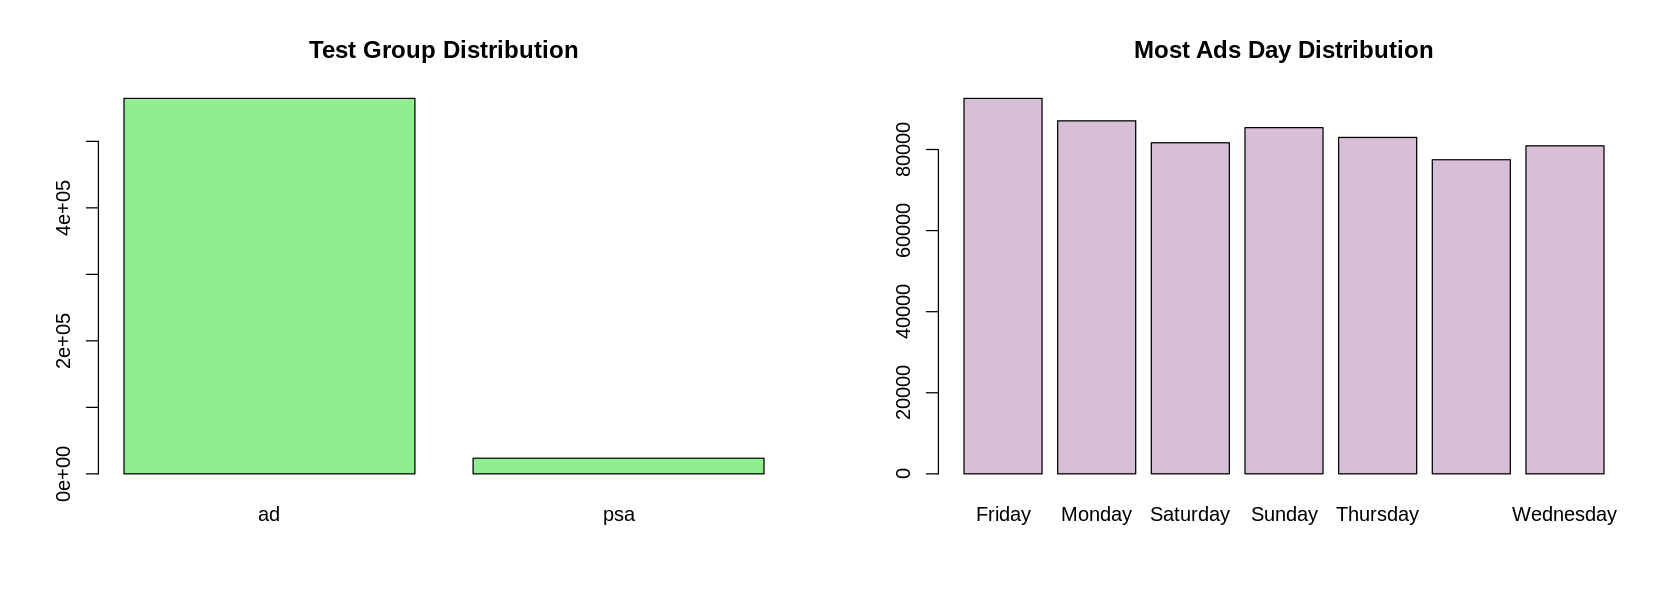

In [8]:
# Set up a 1x2 layout for side-by-side plots
par(mfrow = c(1, 2))

# Bar plot for 'test group'
barplot(table(marketing_campaigns_data$test_group), main = "Test Group Distribution", col = "lightgreen")

# Bar plot for 'most ads day' with 'thistle' color
barplot(table(marketing_campaigns_data$most_ads_day), main = "Most Ads Day Distribution", col = "thistle")

**Test Group Distribution:** <br>
This plot illustrates the class imbalance mentioned earlier. The dataset mostly consists of users who are in the "ad" test group and there is much less data on users who are in the "psa" test group.

**Most Ads Day Distribution:** <br>
It shows the frequency of ads viewed on each day of the week. This information can be valuable for understanding the variation in ad exposure across different days, which is relevant to the research question about the impact of advertising strategies on conversion rates in relation to ad frequency and user engagement patterns. We see that Tuesday has the least user engagement while Friday has the most. 

In [9]:
# Frequencies of most ads day in terms of number of users
most_ads_day_frequency_table <- table(marketing_campaigns_data$most_ads_day)
most_ads_day_frequency_table


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    92608     87073     81660     85391     82982     77479     80908 

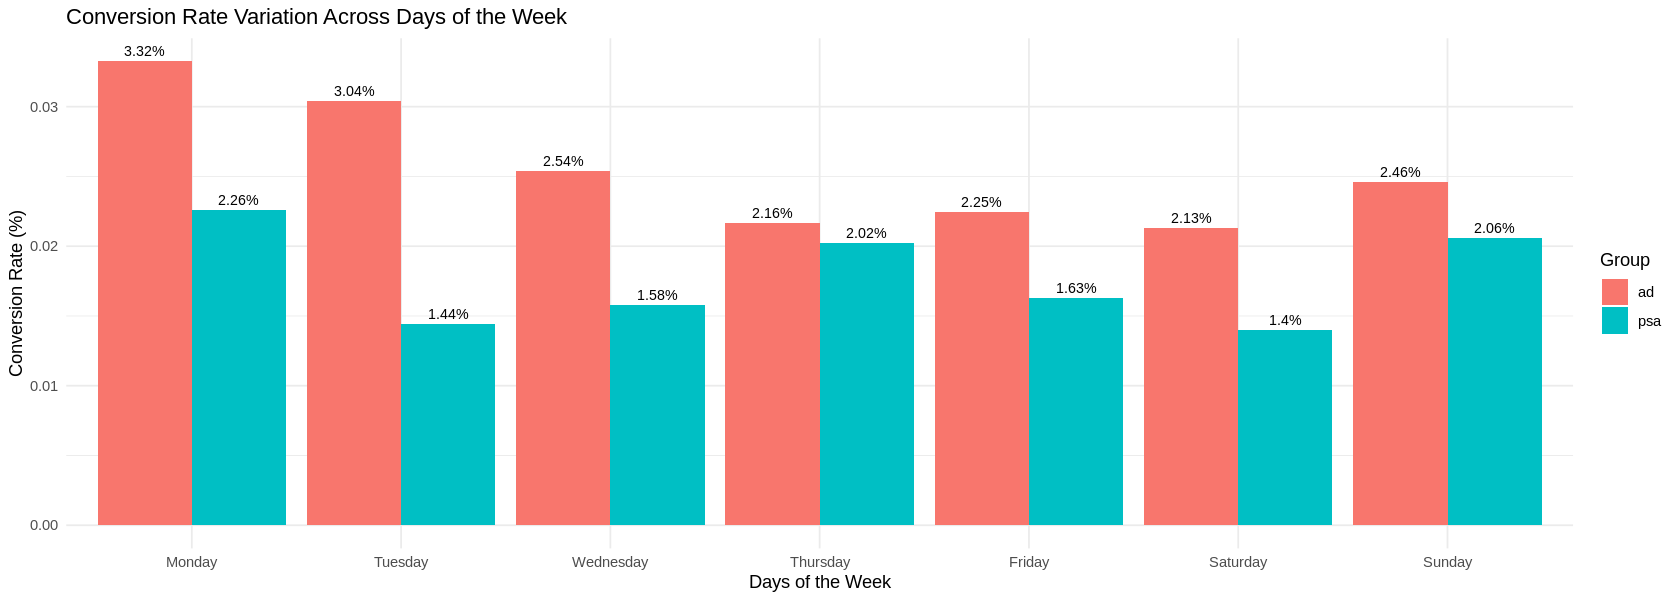

In [10]:
# Creating a clustered bar chart to visualize conversion rates for test groups in different days
order_of_days <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
marketing_campaigns_data$most_ads_day <- factor(marketing_campaigns_data$most_ads_day, levels = order_of_days)

plot <- marketing_campaigns_data %>%
  group_by(most_ads_day, test_group) %>%
  summarize(meanConverted = mean(converted), .groups = 'drop') %>% # Adding .groups argument
  ggplot(aes(x = most_ads_day, y = meanConverted, fill = test_group, label = paste0(round(meanConverted * 100, 2), "%"))) + 
  geom_bar(stat = "identity", position = position_dodge()) +
  geom_text(position = position_dodge(width = 0.9), vjust = -0.5, size = 3, color = "black") +
  labs(x = "Days of the Week", y = "Conversion Rate (%)", fill = "Group") +
  ggtitle("Conversion Rate Variation Across Days of the Week") +
  theme_minimal()

plot

**Calculating the proportions (conversion rates) of both test groups:**

In [11]:
# Calculate conversion rates for each test group
conversion_rates <- aggregate(converted ~ test_group, data = marketing_campaigns_data, FUN = mean)

# Rename the columns
colnames(conversion_rates) <- c("Test_Group", "Conversion_Rate")

# Print the conversion rates
print(conversion_rates)


  Test_Group Conversion_Rate
1         ad      0.02554656
2        psa      0.01785411


**We can see that the converstion rates for users in both test group (ad and psa) are both extremely low, and so far we have that users who have seen the advertisment (ad group) more often converts than users who only see the public service announcement (psa group). They have conversion rate of 0.0255 and 0.0179 respectively. Is this difference significant?**

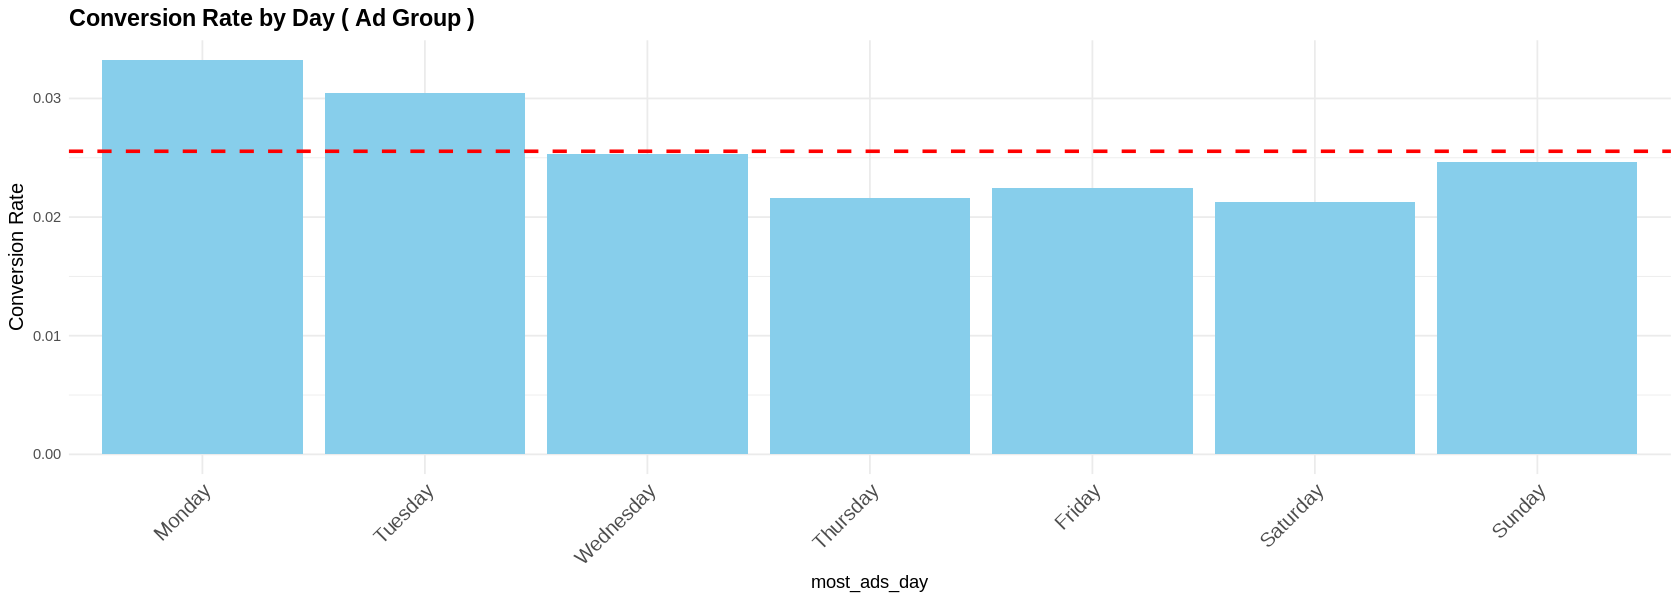

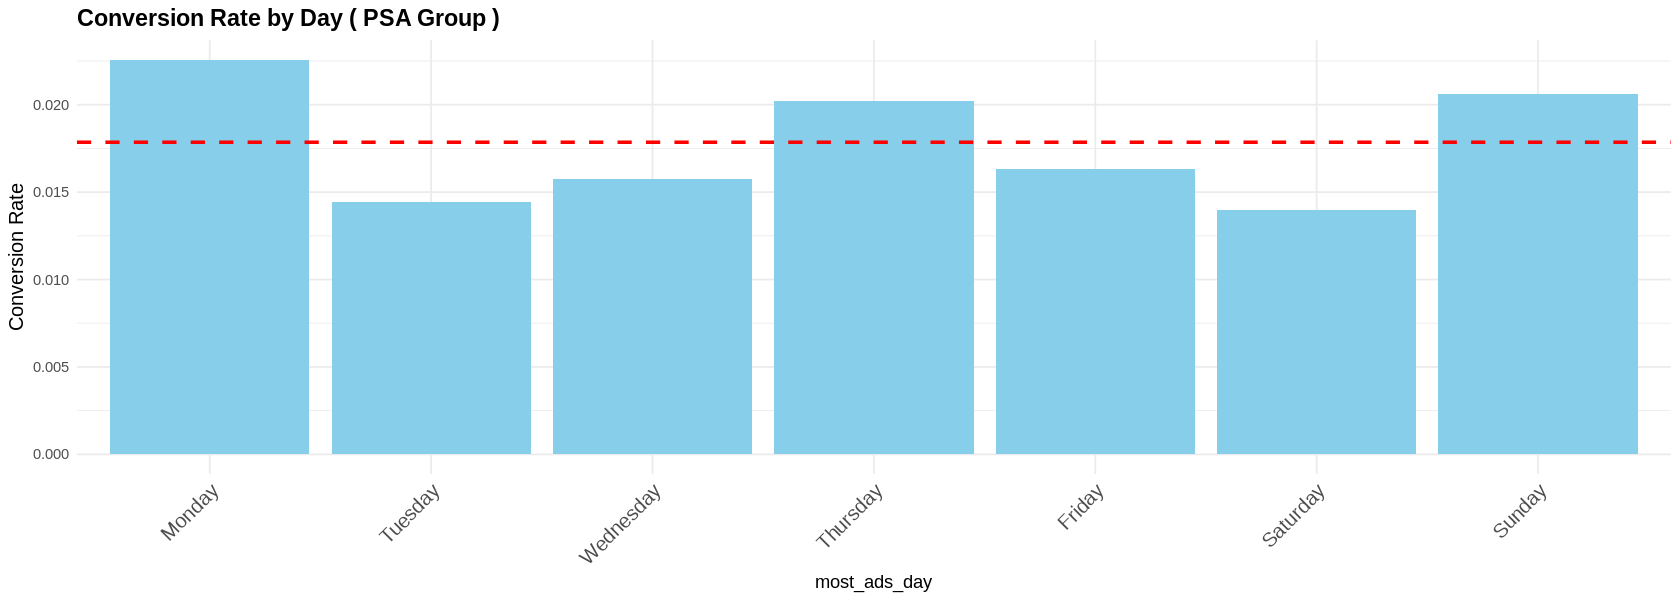

In [12]:
# Create separate data frames for each test group
df_group_ad <- marketing_campaigns_data[marketing_campaigns_data$test_group == "ad", ]
df_group_psa <- marketing_campaigns_data[marketing_campaigns_data$test_group == "psa", ]

# Create a function to generate the bar plot
plot_conversion_by_day <- function(df, group_name) {
  df_day_conv <- aggregate(converted ~ most_ads_day, data = df, FUN = mean)
  colnames(df_day_conv) <- c("most_ads_day", "Conversion_Rate")
  
  p <- ggplot(df_day_conv, aes(x = most_ads_day, y = Conversion_Rate)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    labs(y = "Conversion Rate") +
    ggtitle(paste("Conversion Rate by Day (", group_name, ")")) +
    theme_minimal() +
    geom_hline(yintercept = mean(df$converted), color = "red", linetype = "dashed", linewidth = 1) +
    scale_x_discrete(limits = unique(df_day_conv$most_ads_day)) +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, size = 12),  # Adjust axis label size
      plot.title = element_text(size = 14, face = "bold"),  # Adjust title size
      axis.title.y = element_text(size = 12),  # Adjust y-axis label size
    )
  
  return(p)
}

# Create and display separate plots for each test group
p_ad <- plot_conversion_by_day(df_group_ad, "Ad Group")
p_psa <- plot_conversion_by_day(df_group_psa, "PSA Group")

# Display the plots
print(p_ad)
print(p_psa)



**The first plot**, "Ad Group Conversion Rates," illustrates how conversion rates vary by day within the Ad Group. It provides a visual comparison of conversion rates for users exposed to advertisements on different days, and the red dashed line represents the average conversion rate for this group. This plot helps in understanding the day-to-day fluctuations in conversion rates for the Ad Group.

In the **second plot**, "PSA Group Conversion Rates," the focus shifts to the PSA Group, showing how conversion rates differ for users who only saw public service announcements. Similar to the first plot, it offers a day-to-day comparison of conversion rates within the PSA Group, with the red dashed line denoting the group's average conversion rate. These visualizations enable a direct comparison of conversion rate patterns between the two test groups, providing insights into the impact of advertising strategies on user behavior by day.

### Summary of EDA
**Comparison of Conversion Rates:** The bar plots comparing conversion rates by day for the Ad Group and PSA Group provide a clear visual comparison of how distinct advertising strategies impact conversion rates. They allow me to assess whether one group consistently outperforms the other on specific days. This provides me extra information that is relevant to my research question

**Day-to-Day Variation:** These plots help me identify daily fluctuations in conversion rates. This variation is essential in understanding whether the effectiveness of advertising strategies varies depending on the day of the week.

**Clustered Bar-Chart:** The stacked bar plot further enhances the comparison by presenting the conversion rates by day for both groups. With this, we can see the relative distribution of conversions, making it easier to assess which group is more successful on different days.

**Reference Line:** The inclusion of a reference line (red dashed line) representing the average conversion rate adds context to the plots. It helps us determine whether the observed daily variations are above or below the overall average conversion rate, aiding in interpretation.

## Methods and Plan

Before proceeding with the procedure, the rest of the statistical methods will not include the variables most_ads_hour, most_ads_day and total_ads as they no longer offer additional insight towards the research question. These variables do not exhibit temporal characterisitcs required to carry out A/B testing, and so we will omit them from further analysis. To solve this issue, a new time variable will be defined which is mentioned below. Additionally, user_id will also be omitted since it is not relevant to the analysis either.

#### Procedure
In order to answer the research question, we would first carry out a **two-sample t-test** to find out whether the difference in conversion rates between the two test groups (ad and psa) is statistically significant based on our whole dataset. Then, we have mentioned that our main statistical method will be **A/B testing**, and the method being used will be **group sequential design**. This method allows for interim analyses, it enables early decisions, reduces study duration, and can control error rates while adapting to emerging evidence. However, we do not have a time variable to work on in the dataset, and so we will have to produce one ourselves using the index column since it has ordering. The methodology can be summarized by the following:

1. Load libraries and read in the data using a URL<br>
2. Carry out two-sample t-test on converstion rates for each test group (ad and psa)<br>
3. Calculate a 95% confidence interval via bootstrapping<br>
4. Interpret and visualize results from two-sample t-test
5. Set the index column as the time variable (0 means the observation is collected first, creating ordinality)<br>
6. Specify the intervals for each interim analysis and carry out each test for every fixed sample<br>
7. Use Bonferroni Correction and Pocock method to adjust signifcance level of the interim tests<br>
8. Identify significant tests through principled peeking
9. Interpret and visualize the results from A/B testing

**Assumptions:**
- The two-sample t-test assumes that the data in each group follows a normal distribution, with similar variances, is collected independently, randomly sampled, and measured on a continuous scale.
- Both A/B testing and group sequential designs rely on critical assumptions. A/B testing assumes randomization, independence, homogeneity between groups, and consistent measurements for reliable comparisons between variations. Conversely, group sequential designs assume control of Type I error rates, consistent analyses, adherence to predefined stopping rules, and accurate data collection for robust interim evaluations.

#### Expected Outcomes
**Two-sample t-test:** I expect that the mean conversion rate for users in the "ad" group will be higher than that of users in the "psa" group, and I expect this difference to be statistically significant. This expectation is based on prior campaign performance insights and assumptions regarding the effectiveness of the "ad" group in driving higher conversions compared to the "psa" group.

**Group Sequential Design:** Within the group sequential design, I anticipate significant interim analyses indicating a notable difference in conversion rates between evaluated stages. I expect these analyses to demonstrate a progressively increasing trend in the conversion rates of the "ad" group compared to the "psa" group, affirming the superiority of the "ad" group in generating higher conversion rates. The sequential evaluations are anticipated to exhibit consistency in identifying a significant difference, aligning with the prior hypothesis regarding the effectiveness of the "ad" group.


#### Limitations
**Two-sample t-test:** The limitations of the two-sample t-test encompass sensitivity to assumptions like normality, equal variances, and independence, potentially compromising results when these assumptions are violated. However, I have a very large sample size, and so assumptions regarding normality, equal variances, and independence become less critical, enhancing the test's robustness. It boosts statistical power, reducing the risk of Type II errors, and diminishes the influence of outliers, bolstering the test's accuracy. Moreover, larger samples yield more precise estimates, fostering greater confidence in the obtained results and increasing their reliability.

**Group Sequential Design:** The first thing to consider when carrying out group sequential design is that the tests are nested and not independent, and so a multiple comparisons problem arises. We account for this by using several methods to control the type 1 error such as the Bonferroni method which is mentioned in the procedure. The overestimation of treatment effects due to early stopping, impact on resource allocation, and the assumption of stopping rules also pose challenges.

**Class imbalance:** There is large class imbalance between the two test groups, however, it is highly possible that it is the result of a naturally imbalanced distribution of data, meaning that there are just more users who watches ads. Still, we cannot prove this so it remains to be a potential limitation

## Implementation of a Proposed Model

In [13]:
# Omitting unrequired variables for the analysis
# Redefining index column to be a time variable called "timestamp" using rename()
marketing_data_clean <- marketing_campaigns_data |>
    select(-user_id, -total_ads, -most_ads_day, -most_ads_hour) |>
    rename(timestamp = index)
head(marketing_data_clean)

timestamp,test_group,converted
<dbl>,<chr>,<lgl>
0,ad,FALSE
1,ad,FALSE
2,ad,FALSE
3,ad,FALSE
4,ad,FALSE
5,ad,FALSE


### Two-sample t-test (Difference in Conversion Rates)

In [14]:
# Recalling the conversion rates for "ad" and "psa" test groups
print(conversion_rates)

  Test_Group Conversion_Rate
1         ad      0.02554656
2        psa      0.01785411


In [15]:
# Extracting conversion rate for each test group from conversion_rates
prop_ad <- conversion_rates$Conversion_Rate[conversion_rates$Test_Group == "ad"]
prop_psa <- conversion_rates$Conversion_Rate[conversion_rates$Test_Group == "psa"]

# Standard errors for proportions (Not using finite population correction)
se_ad <- sqrt(prop_ad * (1 - prop_ad) / total_users["ad"])
se_psa <- sqrt(prop_psa * (1 - prop_psa) / total_users["psa"])

# Difference in proportions
prop_diff <- prop_ad - prop_psa

# Pooled standard error
pooled_se <- sqrt(se_ad^2 + se_psa^2)

# Calculate the t-statistic
t_statistic <- prop_diff / pooled_se

# Degrees of freedom
df <- (se_ad^2 + se_psa^2)^2 / (se_ad^4 / (total_users["ad"] - 1) + se_psa^4 / (total_users["psa"] - 1))

# Calculate p-value
p_value <- pt(t_statistic, df, lower.tail = FALSE)

# Display results
cat("Difference in conversion rates (ad - psa):", prop_diff, "\n")
cat("T-Statistic:", t_statistic, "\n")
cat("Degrees of Freedom:", df, "\n")
cat("P-Value:", p_value, "\n")

Difference in conversion rates (ad - psa): 0.007692453 
T-Statistic: 8.657336 
Degrees of Freedom: 26384.31 
P-Value: 2.549917e-18 


### A/B Testing

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"legend" is not a graphical parameter”


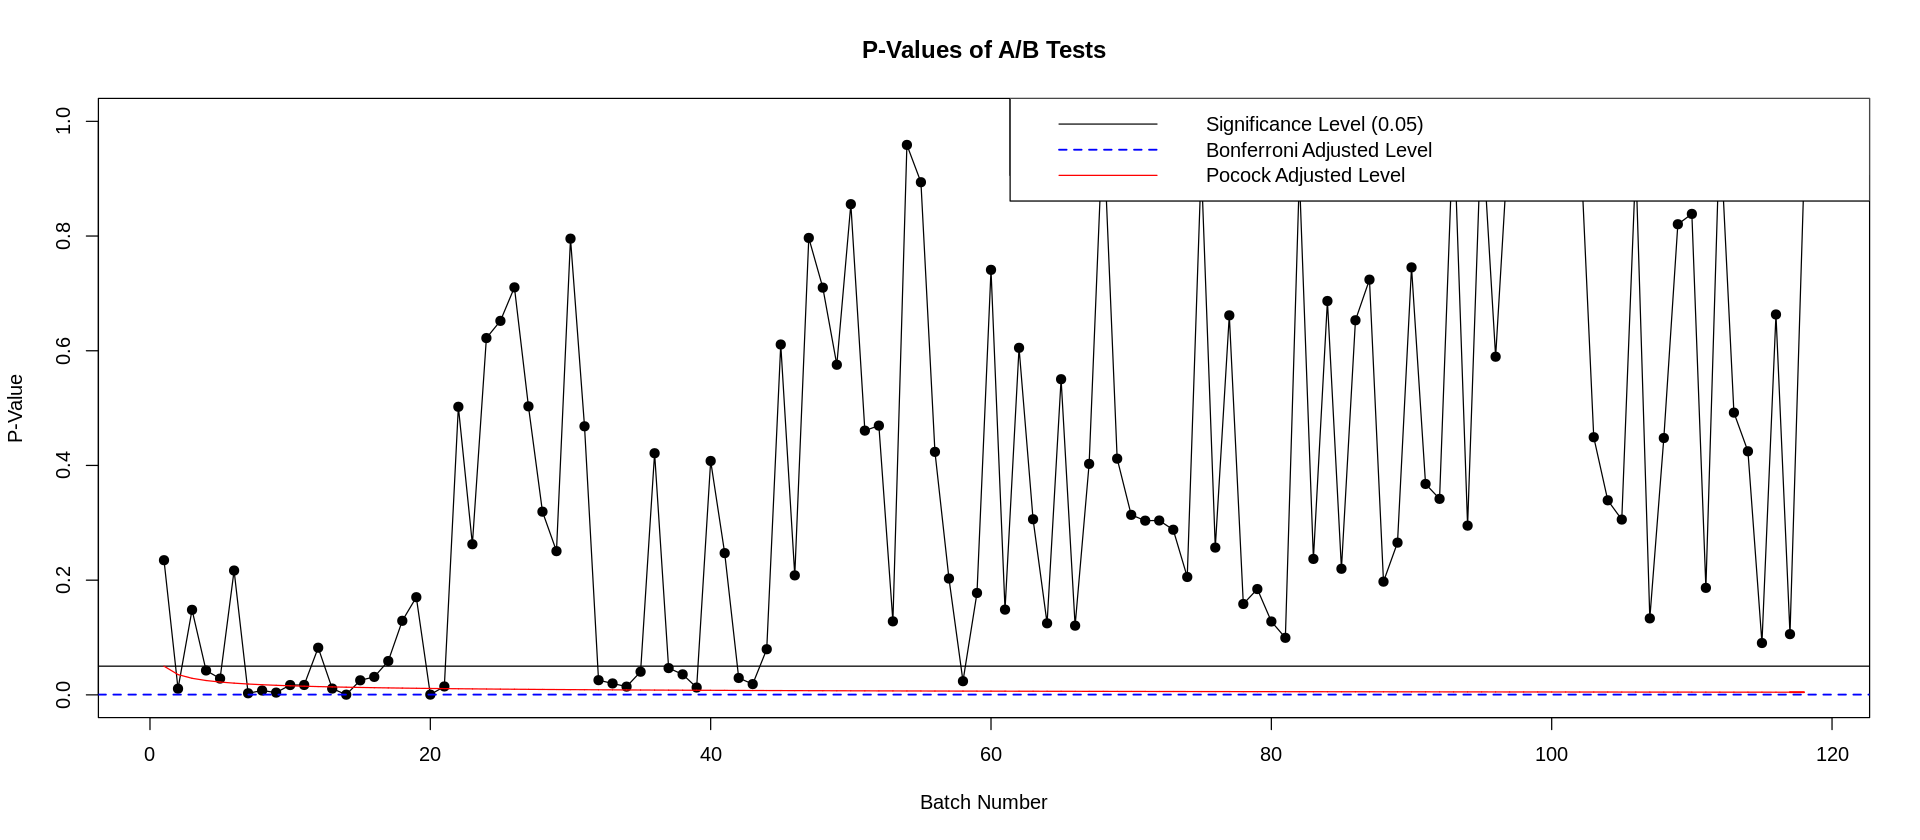

In [16]:
options(repr.plot.width = 16)  # Adjust the width
options(repr.plot.height = 7)  # Adjust the height

# Assuming 'timestamp' represents the order of observations
# Select an arbitrary but reasonable batch size 
# Calculate total observations and determine the number of batches
batch_size <- 5000
num_batches <- ceiling(N / batch_size)

# Create a list to store batches and p-values
batches <- vector("list", num_batches)
p_values <- vector("numeric", num_batches)

# Function to perform A/B test for each batch
perform_AB_test <- function(data) {
    if (length(levels(factor(data$test_group))) == 2) {
        prop_test_result <- t.test(
            converted ~ test_group,
            data = data,
            alternative = "greater", # Specify the alternative hypothesis as needed
            var.equal = TRUE # Assuming equal variance, change to FALSE if otherwise
        )
        return(prop_test_result$p.value)
    } else {
        return(NA) # Return NA if both levels don't exist in the test_group column
    }
}

# Split the sorted data into batches and perform A/B test for each batch
for (i in 1:num_batches) {
    start <- (i - 1) * batch_size + 1
    end <- min(i * batch_size, N)
    batches[[i]] <- marketing_data_clean[start:end, ]
    
    # Perform A/B test on the current batch and store the p-value
    p_value <- perform_AB_test(batches[[i]])
    p_values[i] <- p_value
}


# Calculate Bonferroni-adjusted significance level
adjusted_alpha_bonferroni <- 0.05 / num_batches

# Calculate the adjusted alpha using the Pocock method based on the timestamp order
pocock_adjusted_alpha <- 0.05 / sqrt(1:num_batches)



# Plotting the p-values as points with connecting lines
plot(p_values, pch = 16, xlab = "Batch Number", ylab = "P-Value", main = "P-Values of A/B Tests")
lines(p_values, type = "o", col = "black")  # Adding lines between the points

# Adding the significance levels
abline(h = c(0.05, adjusted_alpha_bonferroni), col = c("black", "blue"), lty = c(1, 2), lwd = c(1, 1.5),
       legend = c("Significance Level (0.05)", "Bonferroni Adjusted Level"))
legend("topright", legend = c("Significance Level (0.05)", "Bonferroni Adjusted Level"), 
       col = c("red", "blue"), lty = c(1, 2), lwd = c(1, 1.5))

# Adding the Pocock-adjusted significance level line
for (i in 1:(num_batches - 1)) {
  segments(i, pocock_adjusted_alpha[i], i + 1, pocock_adjusted_alpha[i + 1], col = "red")
}
segments(num_batches - 1, pocock_adjusted_alpha[num_batches - 1], num_batches, pocock_adjusted_alpha[num_batches], col = "red", lwd = 1.5)

legend("topright", legend = c("Significance Level (0.05)", "Bonferroni Adjusted Level", "Pocock Adjusted Level"), 
       col = c("black", "blue", "red"), lty = c(1, 2, 1), lwd = c(1, 1.5))


In [17]:
# Example assuming p_values is a vector of p-values

# Define alpha levels
alpha_standard <- 0.05
alpha_pocock <- 0.05 / sqrt(1:length(p_values))
alpha_bonferroni <- 0.05 / length(p_values)

# Count statistically significant tests for each alpha
significant_standard <- sum(p_values < alpha_standard)
significant_pocock <- sum(p_values < alpha_pocock)
significant_bonferroni <- sum(p_values < alpha_bonferroni)

# Print the counts
cat("Significant tests at standard alpha (0.05):", significant_standard, "\n")
cat("Significant tests at Pocock-adjusted alpha:", significant_pocock, "\n")
cat("Significant tests at Bonferroni-adjusted alpha:", significant_bonferroni, "\n")


Significant tests at standard alpha (0.05): 24 
Significant tests at Pocock-adjusted alpha: 7 
Significant tests at Bonferroni-adjusted alpha: 2 


**Brief Interpretation of Results:**<br>
The plotted results display p-values for each batch's test as black points connected by lines, our first observation is that the p-values for each test varies quite a lot. The standard 0.05 level tends to identify more significant results, possibly leading to false positives due to multiple comparisons. In contrast, the Pocock and Bonferroni adjusted levels are more stringent, reducing the likelihood of false positives but potentially increasing the chance of missing true effects. Observed significant test counts at different alpha levels fell notably short of the expected trend, suggesting fewer tests reached significance than anticipated, contradicting the projected progressive increase favoring the "ad" group